A case study using iris dataset for KNN algorithm

**Assignment1_AML_DileepKumarPasala**

In [1]:
# import modules for this project
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# load iris dataset
iris = datasets.load_iris()
data, labels = iris.data, iris.target

# training testing split
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)

# print some interested metrics
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data)
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))

# re-do KNN using some specific parameters.
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(train_data, train_labels)
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


0.9666666666666667

Use this command to help with choice of paramters in the `KNeighborsClassifier` function.

In [2]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |
 |  Classifier implementing the k-nearest neighbors vote.
 |
 |  Read more in the :ref:`User Guide <classification>`.
 |
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of a q

Use the following code to generate an artificial dataset which contain three classes. Conduct a similar KNN analysis to the dataset and report your accuracy.

Accuracy of train set: 1.0
Accuracy of test set: 1.0


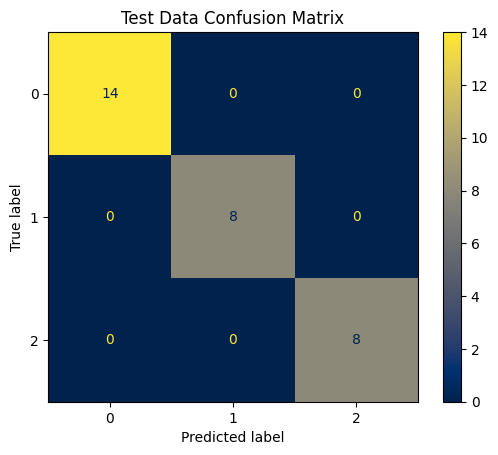

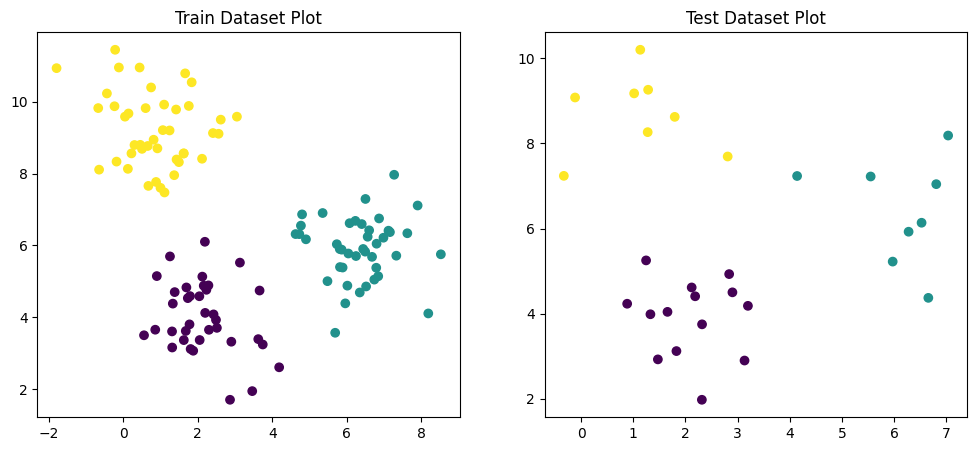

In [5]:
#import required following libraries

#for synthetic data generation
from sklearn.datasets import make_blobs

#to split dataset
from sklearn.model_selection import train_test_split

# to visualize data
import matplotlib.pyplot as plt

# For computations
import numpy as np

# KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# to calculate accuracy
from sklearn.metrics import accuracy_score

# to generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define three different cluster centers for synthetic dataset
centers = [[2, 4], [6, 6], [1, 9]]

# total classes (3)
n_classes = len(centers)

# for the predefined cluster centers create synthetic dataset using 150 samples
data, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)

# dataset splitting into train (80%) and test (20%)
train_set, test_set, train_set_label, test_set_label=train_test_split(data, labels,
                                                                          train_size=0.8,
                                                                          test_size=0.2,
                                                                          random_state=12)


# perform a KNN analysis of the simulated data
# Start KNN classifier (default: k=5, Euclidean distance)
knn=KNeighborsClassifier()

# Train the KNN model using train data
knn.fit(train_set,train_set_label)

#Predict using train data.
train_data_prediction=knn.predict(train_set)

#Predict using test data.
test_data_prediction=knn.predict(test_set)

# output accuracy score
# accuracy for train and test datasets
train_set_accuracy=accuracy_score(train_data_prediction,train_set_label)
test_set_accuracy=accuracy_score(test_data_prediction,test_set_label)

#print accuracy of train and test datasets
print("Accuracy of train set:", train_set_accuracy)
print("Accuracy of test set:", test_set_accuracy)

# plot your different results
# Confusion Matrix
test_data_confusion_matrix = confusion_matrix(test_set_label, test_data_prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=test_data_confusion_matrix, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.green)
plt.title('Test Data Confusion Matrix')
plt.show()

# # Plot train and test datasets
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.scatter(train_set[:,0],train_set[:,1],c=train_set_label,cmap='viridis')
plt.title('Train Dataset Plot')
plt.subplot(1,2,2)
plt.scatter(test_set[:,0],test_set[:,1],c=test_set_label,cmap='viridis')
plt.title('Test Dataset Plot')

plt.show()

